In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
plt.rcParams['legend.title_fontsize'] = 'xx-small'

In [3]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })

## baseline

In [4]:
def error_cal(data, duration):
    
    df = data[data['duration'] == duration].copy()

    df['l_err'] = abs(df['min'] - df['mean'])
    df['u_err'] = abs(df['max'] - df['mean'])

    yerr = [df['l_err'].tolist(), df['u_err'].tolist()]
    
    return df, yerr

In [5]:
def plot(fixed, flow):
    data = fixed[fixed['flow'] == flow].drop(columns=['flow'])

    data = data.groupby(['duration', 'cap']).agg({'result':['mean', 'min', 'max']})

    data.columns = data.columns.droplevel()
    data = data.reset_index()
    
    fig, ax = plt.subplots(figsize=(9,6))

    for duration in [0.2, 0.25, 0.33, 0.5]:
        duration_df, yerr = error_cal(data, duration)
        ax.errorbar(duration_df['cap'], duration_df['mean'], yerr=yerr, capsize=8, label='{}'.format(duration))
        
    ax.set_xlim([0.5, 9.5])
    
    ax.set_xlabel(r'Initially allocated CV capacity (cv\_ini\_cap)', fontsize=16)
    ax.set_ylabel(r'Performance (negative total reroutes)', fontsize=16)
    ax.legend(title="parking duration ratio\n (cv2ncv\_pd)", fontsize=14, title_fontsize=16, loc='best') 
    # bbox_to_anchor=(0.8,0.5)
    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.savefig('mp_{}.pdf'.format(flow))
    plt.close()

### fix baseline

In [6]:
data = pd.read_csv('fix_baseline.txt', delimiter = ",")

In [7]:
data = data[data['result'] > -3000]

In [8]:
for rate in [1.0, 2.0, 3.0, 4.0, 5.0]:
    plot(data, rate)

### max pressure baseline

In [119]:
data = pd.read_csv('mp_baseline.txt', delimiter = ",")

In [120]:
data = data[data['result'] > -3000]

In [121]:
for rate in [0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5]:
    plot(data, rate)

## A2C

### low connectivity

ValueError: operands could not be broadcast together with shapes (20,) (0,) 

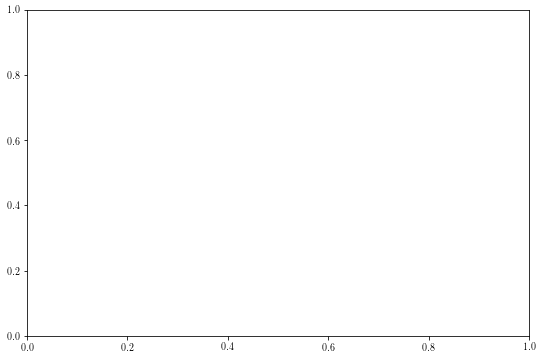

In [9]:
a2c = []
a2c_min = []
a2c_max = []


fig, ax = plt.subplots(figsize=(9,6))

# for i in range(len(learn)):
#     # duration_df, yerr = error_cal(data, duration)
#     # ax.errorbar(duration_df['cap'], duration_df['mean'], yerr=yerr, capsize=8, label='{}'.format(duration))
#     ax.plot(learn[i], label=r'cv\_ini\_cap={}'.format(i+1))

ax.fill_between(range(20), a2c_min, a2c_max, alpha=0.4, color='green')
ax.plot(a2c, color='green', linewidth=3, label='RL-CSM')

ax.fill_between(range(22), -1414, -1067, alpha=0.5, color='tomato')
ax.axhline(-1251, color='tomato', label="max-pressure baseline")
    
ax.set_xlim([0, 21])
ax.set_ylim([-10**5.2, -10**2.6])

ax.set_xlabel(r'Episode', fontsize=16)
ax.set_ylabel(r'Performance (negative total reroutes)', fontsize=16)

# title="Initially allocated \nCV capacity (cv\_ini\_cap)", title_fontsize=16, 
ax.legend(fontsize=14, loc=4) 
# bbox_to_anchor=(0.8,0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_yscale('symlog')
plt.savefig('low_1.pdf')

NameError: name 'learn' is not defined

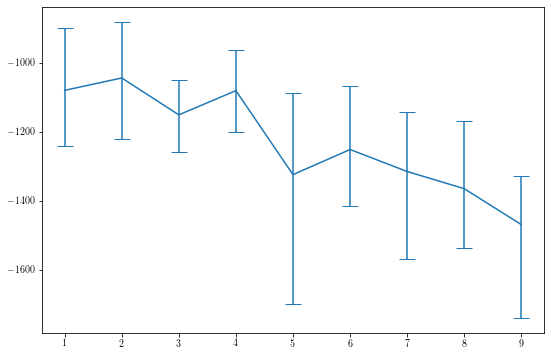

In [10]:
data = pd.read_csv('mp_baseline.txt', delimiter = ",")
data = data[data['result'] > -3000]

fixed = data

data = fixed[fixed['flow'] == 0.33].drop(columns=['flow'])

data = data.groupby(['duration', 'cap']).agg({'result':['mean', 'min', 'max']})

data.columns = data.columns.droplevel()
data = data.reset_index()

fig, ax = plt.subplots(figsize=(9,6))

for duration in [0.2]:
    duration_df, yerr = error_cal(data, duration)
    ax.errorbar(duration_df['cap'], duration_df['mean'], yerr=yerr, capsize=8, label='max-pressure baseline')


yerr = []
ax.errorbar(range(1,10),[max(item) for item in learn], yerr=yerr, capsize=8, label='RL-CSM')


ax.set_xlim([0.5, 9.5])

ax.set_xlabel(r'Initially allocated CV capacity (cv\_ini\_cap)', fontsize=16)
ax.set_ylabel(r'Performance (negative total reroutes)', fontsize=16)
ax.legend(fontsize=14, loc='best') 
# bbox_to_anchor=(0.8,0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('low_2.pdf')

### high  connectivity

In [11]:
data = pd.read_csv('mp_baseline.txt', delimiter = ",")
data = data[data['result'] > -3000]

data[(data['flow']==2.0) & (data['duration']==0.5)& (data['cap']==5)]['result'].mean()

-466.0

ValueError: operands could not be broadcast together with shapes (20,) (0,) 

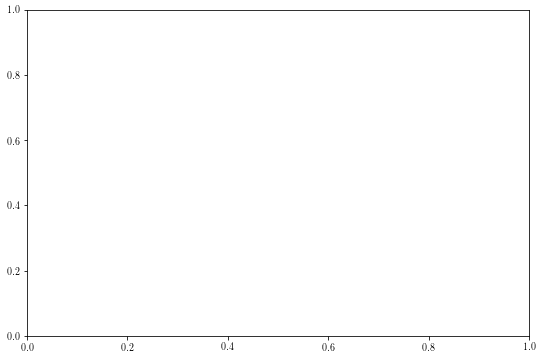

In [12]:
a2c = []
a2c_min = []
a2c_max = []


fig, ax = plt.subplots(figsize=(9,6))

# for i in range(len(learn)):
#     # duration_df, yerr = error_cal(data, duration)
#     # ax.errorbar(duration_df['cap'], duration_df['mean'], yerr=yerr, capsize=8, label='{}'.format(duration))
#     ax.plot(learn[i], label=r'cv\_ini\_cap={}'.format(i+1))

ax.fill_between(range(20), a2c_min, a2c_max, alpha=0.4, color='green')
ax.plot(a2c, color='green', linewidth=3, label='RL-CSM')

ax.fill_between(range(22), -674, -384, alpha=0.5, color='red')
ax.axhline(-466.0, color='red', label="max-pressure baseline")

ax.fill_between(range(22), -609, -406, alpha=0.8, color='cornflowerblue')
ax.axhline(-525, color='cornflowerblue', label="no-action baseline")
    
ax.set_xlim([0, 21])
ax.set_ylim([-10**5.2, -10**2])

ax.set_xlabel(r'Episode', fontsize=16)
ax.set_ylabel(r'Performance (negative total reroutes)', fontsize=16)

# title="Initially allocated \nCV capacity (cv\_ini\_cap)", title_fontsize=16, 
ax.legend(fontsize=14, loc=4) 
# bbox_to_anchor=(0.8,0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_yscale('symlog')
plt.savefig('high_1.pdf')

NameError: name 'learn' is not defined

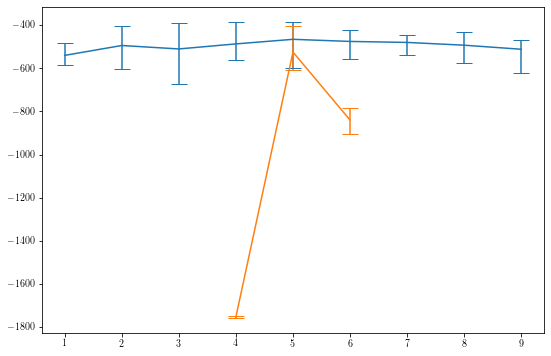

In [13]:
fig, ax = plt.subplots(figsize=(9,6))

data = pd.read_csv('mp_baseline.txt', delimiter = ",")
data = data[data['result'] > -3000]

fixed = data

data = fixed[fixed['flow'] == 2.0].drop(columns=['flow'])

data = data.groupby(['duration', 'cap']).agg({'result':['mean', 'min', 'max']})

data.columns = data.columns.droplevel()
data = data.reset_index()

for duration in [0.5]:
    duration_df, yerr = error_cal(data, duration)
    ax.errorbar(duration_df['cap'], duration_df['mean'], yerr=yerr, capsize=8, label='max-pressure baseline')
    

data = pd.read_csv('fix_baseline.txt', delimiter = ",")
data = data[data['result'] > -3000]

fixed = data

data = fixed[fixed['flow'] == 2.0].drop(columns=['flow'])

data = data.groupby(['duration', 'cap']).agg({'result':['mean', 'min', 'max']})

data.columns = data.columns.droplevel()
data = data.reset_index()


for duration in [0.5]:
    duration_df, yerr = error_cal(data, duration)
    ax.errorbar(duration_df['cap'], duration_df['mean'], yerr=yerr, capsize=8, label='no-action baseline')


yerr = []
ax.errorbar(range(1,10),[max(item) for item in learn], yerr=yerr, capsize=8, label='RL-CSM')


ax.set_xlim([0.5, 9.5])

ax.set_xlabel(r'Initially allocated CV capacity (cv\_ini\_cap)', fontsize=16)
ax.set_ylabel(r'Performance (negative total reroutes)', fontsize=16)
ax.legend(fontsize=14, loc='best') 
# bbox_to_anchor=(0.8,0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('high_2.pdf')